In [ ]:
#Importing the packags
# pip install --user -U nltk
# pip install -U scikit-learn

import numpy as np
import pandas as pd
import re,string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2
import pickle
import nltk
nltk.download('stopwords')
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/bbc-text.csv', encoding = 'latin1')
df = df.sample(frac = 1)
df

,category,text
1304,business,uk homes hit Â£3.3 trillion total the value of...
932,business,strong quarterly growth for nike nike has repo...
414,politics,brown and blair face new rift claims for the u...
1946,sport,wada will appeal against ruling the world anti...
2102,tech,hacker threat to apple s itunes users of apple...
...,...,...
422,sport,scots suffer another injury blow scotland s ba...
1441,tech,mobile games come of age the bbc news website ...
181,tech,blogger grounded by her airline a us airline a...
580,tech,napster offers rented music to go music downlo...


In [ ]:
#No of a categories
len(set(df['category']))

5

In [ ]:
df.groupby('category').category.count()

category
business         510
entertainment    386
politics         417
sport            511
tech             401
Name: category, dtype: int64

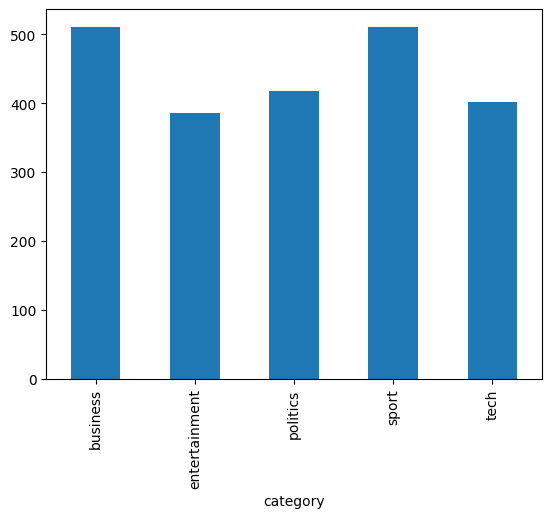

In [ ]:
#Analyzing data
df.groupby('category').category.count().plot.bar()
plt.show()

In [ ]:
#Data Preprocessing

In [ ]:
# df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]

In [ ]:
#stop words
nltk.download('stopwords')
words = stopwords.words("english")
print(words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Data Cleaning using stemmer

stemmer = PorterStemmer()
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("")
# data

'i am love comput'

In [ ]:
data = "I am loving computing".split()
" ".join([stemmer.stem(i) for i in data])
# stemmer.stem("I am loving computing")

'i am love comput'

In [ ]:
# Data Cleaning removing stopwords

In [ ]:
news = ''
data = "I am loving computing".lower().split()
for i in data:
  if i not in words:
    news = news + " " +i
news
  # print(i)

' loving computing'

In [ ]:
df['text'][0]

'tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to high

In [ ]:
# Doing all cleaning process using regex, stemmer, stopwords for all data
df['text'] = [re.sub("[^a-zA-Z]", " ", i).lower() for i in df['text']]
df['text'] = list(map(lambda x: " ".join([i for i in x.lower().split() if i not in words]), df['text']))
# df['text'] = [" ".join(word.split() for word in df['text'] if word.lower() not in stopwords.words('english'))]
df

,category,text
1304,business,uk homes hit trillion total value uk housing s...
932,business,strong quarterly growth nike nike reported bes...
414,politics,brown blair face new rift claims umpteenth tim...
1946,sport,wada appeal ruling world anti doping agency wa...
2102,tech,hacker threat apple itunes users apple music j...
...,...,...
422,sport,scots suffer another injury blow scotland back...
1441,tech,mobile games come age bbc news website takes l...
181,tech,blogger grounded airline us airline attendant ...
580,tech,napster offers rented music go music downloadi...


In [ ]:
df.to_csv('cleaned_bbc_data.csv')

In [ ]:
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() ]).lower())
df

,category,text,cleaned
1304,business,uk homes hit trillion total value uk housing s...,uk home hit trillion total valu uk hous stock ...
932,business,strong quarterly growth nike nike reported bes...,strong quarterli growth nike nike report best ...
414,politics,brown blair face new rift claims umpteenth tim...,brown blair face new rift claim umpteenth time...
1946,sport,wada appeal ruling world anti doping agency wa...,wada appeal rule world anti dope agenc wada ap...
2102,tech,hacker threat apple itunes users apple music j...,hacker threat appl itun user appl music jukebo...
...,...,...,...
422,sport,scots suffer another injury blow scotland back...,scot suffer anoth injuri blow scotland back ro...
1441,tech,mobile games come age bbc news website takes l...,mobil game come age bbc news websit take look ...
181,tech,blogger grounded airline us airline attendant ...,blogger ground airlin us airlin attend fight j...
580,tech,napster offers rented music go music downloadi...,napster offer rent music go music download rej...


In [ ]:
# print(words)

In [ ]:
# words = stopwords.words("nepali")
# words

In [ ]:
#for all steaming,stopword,regex
df['cleaned'] = df['text'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
df

,category,text,cleaned
1304,business,uk homes hit trillion total value uk housing s...,uk home hit trillion total valu uk hous stock ...
932,business,strong quarterly growth nike nike reported bes...,strong quarterli growth nike nike report best ...
414,politics,brown blair face new rift claims umpteenth tim...,brown blair face new rift claim umpteenth time...
1946,sport,wada appeal ruling world anti doping agency wa...,wada appeal rule world anti dope agenc wada ap...
2102,tech,hacker threat apple itunes users apple music j...,hacker threat appl itun user appl music jukebo...
...,...,...,...
422,sport,scots suffer another injury blow scotland back...,scot suffer anoth injuri blow scotland back ro...
1441,tech,mobile games come age bbc news website takes l...,mobil game come age bbc news websit take look ...
181,tech,blogger grounded airline us airline attendant ...,blogger ground airlin us airlin attend fight j...
580,tech,napster offers rented music go music downloadi...,napster offer rent music go music download rej...


In [ ]:
# Training model
from sklearn.linear_model import LogisticRegression
log_regression = LogisticRegression()

vectorizer = TfidfVectorizer()
X = df['text']
Y = df['category'].astype('str')

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15) #Splitting dataset


# #Creating Pipeline
pipeline = Pipeline([('vect', vectorizer),
                     ('chi',  SelectKBest(chi2, k=2000)),
                     ('clf', LogisticRegression())])


# #Training model
model = pipeline.fit(X_train, y_train)

# #Creating pickle file
with open('LogisticRegression.pickle', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
X_test

2069    ferguson puts faith youngsters manchester unit...
2101    abbas tolerate attacks palestinian leader mahm...
1669    mps issued blackberry threat mps thrown common...
1058    howl helps boost japan cinemas japan box offic...
581     reaction spanish press england defeat spain we...
                              ...                        
1123    qantas sees profits fly record australian airl...
40      labour targets hardcore truants fresh crackdow...
657     freeze anti spam campaign campaign lycos europ...
121     jack cunningham stand veteran labour mp former...
1243    bridge could miss rest season chelsea left bac...
Name: text, Length: 334, dtype: object

In [ ]:
y_test

2069            sport
2101         politics
1669         politics
1058    entertainment
581             sport
            ...      
1123         business
40           politics
657              tech
121          politics
1243            sport
Name: category, Length: 334, dtype: object

In [ ]:
#Accuracy
from sklearn.metrics import accuracy_score
predict_news_cat = model.predict(X_test)
# print(predict_news_cat)
print(accuracy_score(y_test,predict_news_cat))
# print('\n')
# print(predict_news_cat)

0.9790419161676647


In [ ]:
# file = open('/content/news.txt','r')
# news = file.read()
# file.close()

news = input("Enter news = ")
news_data = {'predict_news':[news]}
news_data_df = pd.DataFrame(news_data)
news_data_df
predict_news_cat = model.predict(news_data_df['predict_news'])
print("Predicted news category = ",predict_news_cat[0])

Enter news = Krishna Man Pradhan, who was recommended for Election Commmission commissioner, has withdrawn his name as the Parliamentary Hearing Committee looked set to reject him.  Pradhan himself has written to the committee on Monday to not endorse him after it became apparent that the committee would not endorse him following allegations of sexual abuse.  "His letter has been received," said General Secretary of the Federal Parliament Secretariat Padma Prasad Pandeya who is also secretary of the committee. "He has said that though he has been recommended to the post of election commissioner, he does not have enthusiasm and desire to work in the recommended position due to the false propaganda about him outside."  The committee was earlier scheduled to meet at 11:30 in the morning to take a decision on whether to endorse Pradhan or not. The meeting was later postponed for five in the evening.  A woman had complained with the committee claiming that Pradhan sexually exploited her wit

In [ ]:
# confusion matrix and classification report(precision, recall, F1-score)
ytest = np.array(y_test)
print(classification_report(ytest,model.predict(X_test)))
print(confusion_matrix(ytest,model.predict(X_test)))

               precision    recall  f1-score   support

     business       0.94      0.97      0.96        66
entertainment       1.00      0.97      0.98        63
     politics       0.97      0.98      0.97        57
        sport       0.99      1.00      0.99        78
         tech       1.00      0.97      0.99        70

     accuracy                           0.98       334
    macro avg       0.98      0.98      0.98       334
 weighted avg       0.98      0.98      0.98       334

[[64  0  2  0  0]
 [ 2 61  0  0  0]
 [ 0  0 56  1  0]
 [ 0  0  0 78  0]
 [ 2  0  0  0 68]]


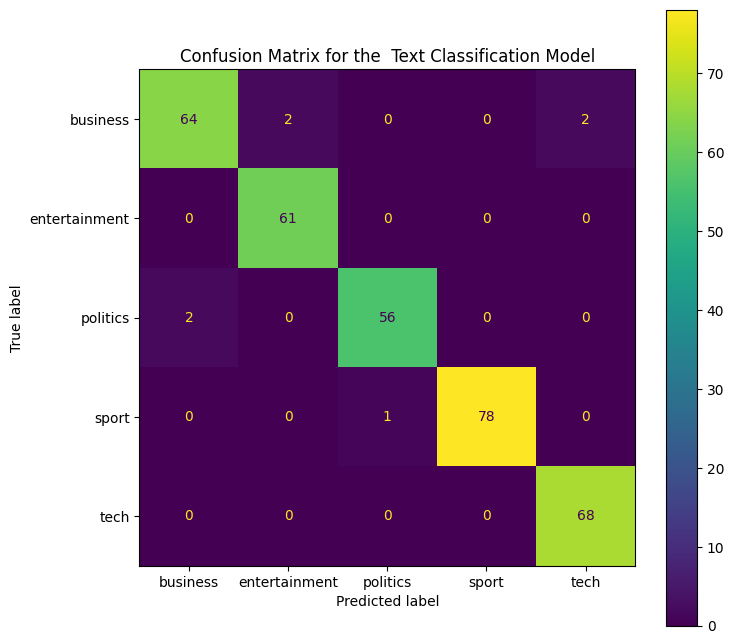

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(model.predict(X_test),ytest)
# Change figure size and increase dpi for better resolution
# and get reference to axes object
fig, ax = plt.subplots(figsize=(8,8), dpi=100)
class_names = ['business','entertainment','politics','sport','tech']
# initialize using the raw 2D confusion matrix
# and output labels (in our case, it's 0 and 1)
display = ConfusionMatrixDisplay(cm, display_labels=class_names)

# set the plot title using the axes object
ax.set(title='Confusion Matrix for the  Text Classification Model')

# show the plot.
# Pass the parameter ax to show customizations (ex. title)
display.plot(ax=ax);